# Problem 

24

In [1]:
!wget https://instagram.fsgn5-7.fna.fbcdn.net/vp/4da4f31d99bb40c5cb1afd81ed276c87/5DF5C522/t51.2885-15/e35/66086421_2182884628668141_5339370469832511095_n.jpg?_nc_ht=instagram.fsgn5-7.fna.fbcdn.net

--2019-08-24 14:44:50--  https://instagram.fsgn5-7.fna.fbcdn.net/vp/4da4f31d99bb40c5cb1afd81ed276c87/5DF5C522/t51.2885-15/e35/66086421_2182884628668141_5339370469832511095_n.jpg?_nc_ht=instagram.fsgn5-7.fna.fbcdn.net
Resolving instagram.fsgn5-7.fna.fbcdn.net (instagram.fsgn5-7.fna.fbcdn.net)... 203.113.183.161, 2402:800:6351:107:face:b00c:3333:a3f
Connecting to instagram.fsgn5-7.fna.fbcdn.net (instagram.fsgn5-7.fna.fbcdn.net)|203.113.183.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76606 (75K) [image/jpeg]
Saving to: ‘66086421_2182884628668141_5339370469832511095_n.jpg?_nc_ht=instagram.fsgn5-7.fna.fbcdn.net’

66086421_2182884628 100%[===================>]  74.81K   105KB/s    in 0.7s    

2019-08-24 14:44:53 (105 KB/s) - ‘66086421_2182884628668141_5339370469832511095_n.jpg?_nc_ht=instagram.fsgn5-7.fna.fbcdn.net’ saved [76606/76606]



In [3]:
%cd /content

/content


In [0]:
%mv /content/66086421_2182884628668141_5339370469832511095_n.jpg?_nc_ht=instagram.fsgn5-7.fna.fbcdn.net img.jpg

In [0]:
import os
import json 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

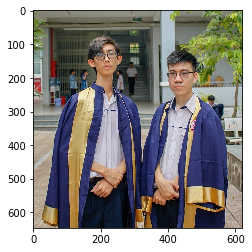

In [33]:
im_path = "/content/img.jpg"
img = Image.open(im_path)
plt.imshow(img)

In [0]:
img = img.convert('L') #convert to grayscale 
tmp = img.resize((600, 600))
np_img = np.array(tmp)
img.save('foo.png')

In [35]:
np_img.shape

(600, 600)

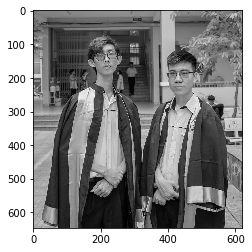

In [36]:
plt.imshow(img,cmap='gray', vmin=0, vmax=255)

In [0]:
def crop_img(img, size_x, size_y, w, h):
    ls_img = []
    for i in range(int(size_x/w)):
        for j in range(int(size_y/h)):
            index = i*int(size_x/w) + j 
            y0 = i * w
            x0 = j * h
#             ls_img.append(img[y0:y0+h , x0:x0+w, :]) #RGB
            ls_img.append(img[y0:y0+h , x0:x0+w]) #Grayscale 
    return ls_img, index+1

In [0]:
list_new, n = crop_img(np_img, 600, 600, 300,300)

In [39]:
list_new[1].shape

(300, 300)

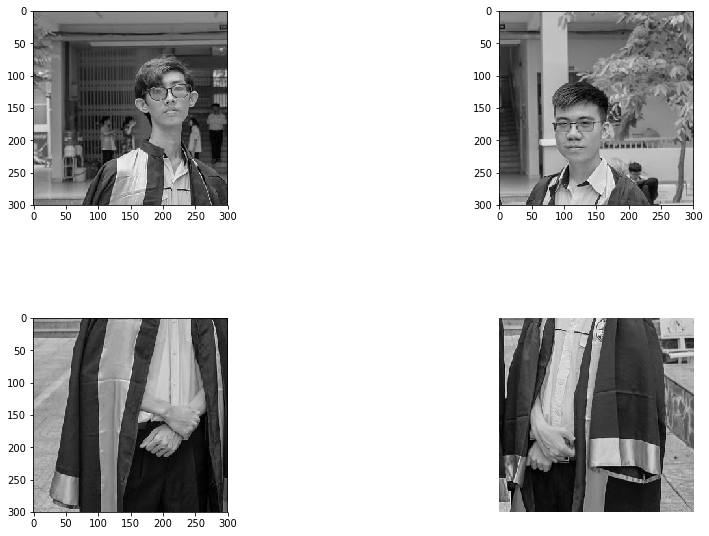

In [40]:
def show_crop_images(list_img, n_to_show):
    plt.figure(figsize=(16,16))
    for i in range(n_to_show):
        img = list_img[i]
        plt.subplot(n_to_show*2/4+1, 4, (i+1)*2-1)
        plt.imshow(img,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
show_crop_images(list_new,4)

In [0]:
def merge_im_col(ls,row, col):
    ls_tmp = []
    for i in range(row):
        tmp = ls[i*row]
        for j in range(col-1):
            index = i*row + j + 1 
            tmp = np.concatenate((tmp,ls[index]),axis=1)  
        ls_tmp.append(tmp)
    return ls_tmp

In [0]:
def merge_im_row(ls,row):
    tmp = ls[0]
    for row_im in ls[1:]:
        tmp = np.concatenate((tmp,row_im))
    return tmp

In [43]:
list_new[0].shape

(300, 300)

In [0]:
im = merge_im_col(list_new,2,2)
im = merge_im_row(im,2)

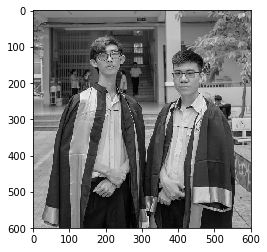

In [45]:
# plt.imshow(im[1])
plt.imshow(im,cmap='gray', vmin=0, vmax=255)

In [0]:
import random
tmp = list_new[1:]
random.shuffle(tmp)
list_new[1:] = tmp

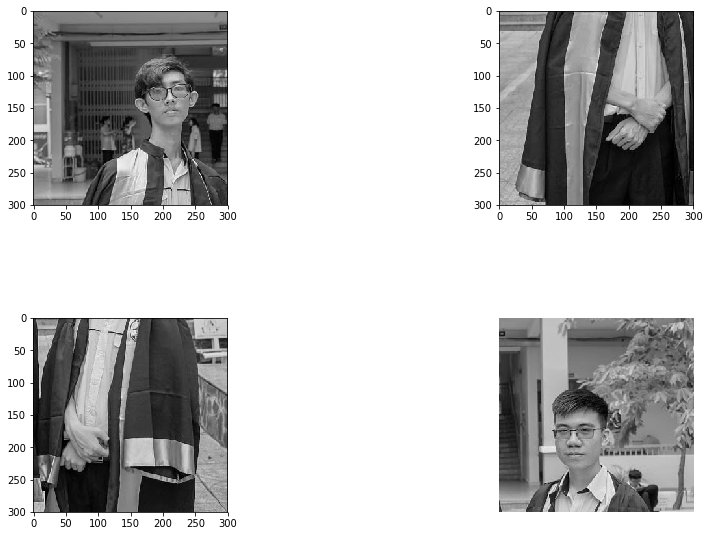

In [47]:
show_crop_images(list_new,4)

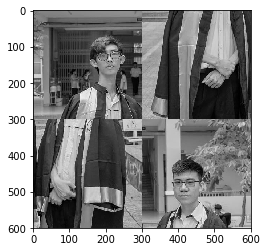

In [48]:
im = merge_im_col(list_new,2,2)
im = merge_im_row(im,2)
plt.imshow(im,cmap='gray', vmin=0, vmax=255)

In [49]:
list_new[0]

array([[125, 127, 128, ..., 141, 141, 141],
       [120, 124, 124, ..., 140, 140, 140],
       [114, 120, 122, ..., 138, 138, 138],
       ...,
       [125, 131, 136, ...,  51,  51,  54],
       [124, 130, 134, ...,  51,  52,  53],
       [120, 125, 129, ...,  50,  52,  53]], dtype=uint8)

# Solution_1

n = 36

list_new : list gồm các mảnh ghép (100,100,3)

số cột = 6 

số hàng = 6

In [0]:
import skimage.measure
from scipy import signal

def pooling_max(img, size):
    return skimage.measure.block_reduce(img, (size,size), np.max)

def pooling_mean(img, size):
    return skimage.measure.block_reduce(img, (size,size), np.mean)

In [0]:
def conv2d_1(x):
    w_k = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1],],
                   dtype='float')
    
    return signal.convolve2d(x, w_k, 'valid')

In [0]:
def conv2d_2(x):
    w_k = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1],],
                   dtype='float')
    
    return signal.convolve2d(x, w_k, 'valid')

In [0]:
def calc_loss_vertical(imgx,imgy, size_x, size_y):    
    res = 0  
    # imgx = pooling_max(imgx,5)
    # imgy = pooling_max(imgy,5)
    imgx = conv2d_2(imgx)
    imgy = conv2d_2(imgy)
    x = imgx[size_y,:]
    y = imgy[0,:]
    for i in range(size_y):
        res += abs(x[i] - y[i])*abs(x[i] - y[i])
    
    return res

In [0]:
def calc_loss_horizontal(imgx,imgy, size_x, size_y):
    res = 0
    # imgx = pooling_max(imgx,5)
    # imgy = pooling_max(imgy,5)
    imgx = conv2d_1(imgx)
    imgy = conv2d_1(imgy)
    x = imgx[:,size_x]
    y = imgy[:,0]
    for i in range(size_x):
        res += abs(x[i] - y[i])*abs(x[i] - y[i])
        
    return res

In [0]:
def get_index(x, y, size_x):
    return x*size_x +y

In [0]:
def solve(ls, size_x, size_y, n):
    argmin = 99999999999
    final_list = []
    for cur in range(n):
        tmp = list(ls[cur])
        loss = 0
        #TO DO 
        for i in range(size_x):
            for j in range(size_y):
                index = get_index(i, j, size_x)
                
                if i > 0:
                    index_u = get_index(i - 1,j,size_x)
                    loss = loss + calc_loss_vertical(tmp[index_u], tmp[index], size_x, size_y)
                if i < size_x-1:
                    index_d = get_index(i + 1,j,size_x)
                    loss = loss + calc_loss_vertical(tmp[index], tmp[index_d], size_x, size_y)
                if j > 1:
                    index_l = get_index(i, j - 1 , size_x)
                    loss = loss + calc_loss_horizontal(tmp[index_l], tmp[index], size_x, size_y)
                if j < size_y-1:
                    index_r = get_index(i, j + 1 ,size_x)
                    loss = loss + calc_loss_horizontal(tmp[index], tmp[index_r], size_x, size_y)
                
        print(loss, ' ', cur)
        if loss < argmin:
            argmin = loss
            final_list = tmp
    return final_list

In [55]:
len(list_new)

4

In [0]:
import itertools
another_list = list(itertools.permutations(list_new))

63658.0   0
13498.0   1
7130.0   2
17030.0   3
6760.0   4
53408.0   5
60544.0   6
16336.0   7
21106.0   8
16552.0   9
21744.0   10
49150.0   11
53460.0   12
44672.0   13
55586.0   14
61792.0   15
61800.0   16
62994.0   17
14374.0   18
47446.0   19
12720.0   20
59286.0   21
15948.0   22
14478.0   23


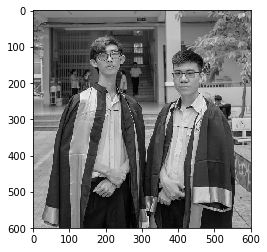

In [85]:
im = merge_im_col(solve(another_list, 2, 2, len(another_list)),2,2)
im = merge_im_row(im,2)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

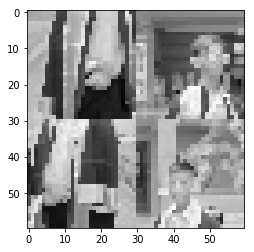

In [58]:
im = pooling_max(im,10)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)